In [6]:
# !pip install xarray
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install scikit-learn
# !pip install xgboost
# !pip install torch
# !pip install openpyxl

In [2]:
import os

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lars, Lasso, LassoLars, OrthogonalMatchingPursuit, ARDRegression, BayesianRidge
from sklearn.svm import LinearSVR, NuSVR, SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score

import xgboost as xgb

import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch import nn

In [3]:
aws_df = pd.read_excel("rainfall-2015_2023.xlsx")
aws_df.head()

,Index2,Andheri,B ward,Bandra,Byculla,C ward,Chembur,Chincholi,Colaba,D Ward,...,Mulund,N ward,Nariman Fire,Rawali camp,S ward,SWD Workshop dadar,Thakare natya,Vikhroli,Worli,vileparle W
0,2015-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-06-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-06-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-06-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-06-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
aws_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105408 entries, 0 to 105407
Data columns (total 37 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Index2              105408 non-null  datetime64[ns]
 1   Andheri             105400 non-null  float64       
 2   B ward              105342 non-null  float64       
 3   Bandra              105388 non-null  float64       
 4   Byculla             105402 non-null  float64       
 5   C ward              105400 non-null  float64       
 6   Chembur             105386 non-null  float64       
 7   Chincholi           105153 non-null  float64       
 8   Colaba              105392 non-null  float64       
 9   D Ward              105402 non-null  float64       
 10  Dahisar             105394 non-null  float64       
 11  Dindoshi            105402 non-null  float64       
 12  F North             105391 non-null  float64       
 13  F South             105398 no

In [5]:
aws_df.describe()

,Index2,Andheri,B ward,Bandra,Byculla,C ward,Chembur,Chincholi,Colaba,D Ward,...,Mulund,N ward,Nariman Fire,Rawali camp,S ward,SWD Workshop dadar,Thakare natya,Vikhroli,Worli,vileparle W
count,105408,105400.000000,105342.000000,105388.000000,105402.000000,105400.000000,105386.000000,105153.000000,105392.000000,105402.000000,...,105388.000000,105397.000000,105394.000000,105401.000000,105142.000000,105360.000000,105393.000000,105389.000000,105377.000000,105379.000000
mean,2019-08-01 07:52:30,0.221814,0.189982,0.200552,0.198314,0.176791,0.226229,0.216861,0.185875,0.187949,...,0.228194,0.219225,0.167074,0.195001,0.244541,0.228224,0.235435,0.246020,0.207730,0.208006
min,2015-06-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017-07-01 11:56:15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019-07-31 23:52:30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2021-08-31 11:48:45,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2023-09-30 23:45:00,45.720000,28.450000,35.560000,27.690000,27.690000,35.560000,29.970000,28.700000,36.320000,...,53.340000,33.020000,25.400000,29.720000,32.770000,29.970000,34.290000,33.780000,33.780000,34.800000
std,NaN,1.097824,0.943621,1.012277,0.978841,0.884220,1.085415,1.041343,0.938328,0.955546,...,1.040737,1.013211,0.849970,0.950343,1.094797,1.097404,1.098261,1.135192,1.072614,1.043341


In [6]:
aws_df.isna().sum(axis=0)

Index2                  0
Andheri                 8
B ward                 66
Bandra                 20
Byculla                 6
C ward                  8
Chembur                22
Chincholi             255
Colaba                 16
D Ward                  6
Dahisar                14
Dindoshi                6
F North                17
F South                10
G South                34
Gowanpada              94
H West ward            95
K East ward            12
K West ward             6
Kandivali               5
Kurla                  10
L ward                 21
M West ward            13
MCGM 1                 88
Malvani                21
Marol                   5
Memonwada               9
Mulund                 20
N ward                 11
Nariman Fire           14
Rawali camp             7
S ward                266
SWD Workshop dadar     48
Thakare natya          15
Vikhroli               19
Worli                  31
vileparle W            29
dtype: int64

In [7]:
aws_df.fillna(0, inplace=True)

Some data is missing for forecasts at 00Z of PR in 2015. Thus dropping all the data corresponding to 2015.

Also, PR analysis data is only from 2019, so need a way to do some augmentation.

Ignoring PR analysis data for now since PW is available

In [8]:
aws_df.rename(columns={"Index2": "Time"}, inplace=True)

In [9]:
aws_df = aws_df[aws_df["Time"].dt.year.isin([year for year in range(2016, 2024)])].reset_index(drop=True)

14 July 2022 shows a lot of missing data based on filename analysis that was done at the end of the notebook, so remove the corresponding data points from aws_normalized (also remove 15 July since these points will require GFS forecasts from 14 July based on current model)

In [10]:
aws_df = aws_df[~aws_df["Time"].dt.date.isin([pd.to_datetime("2022-07-14").date(), pd.to_datetime("2022-07-15").date()])].reset_index(drop=True)

In [11]:
aws_df

,Time,Andheri,B ward,Bandra,Byculla,C ward,Chembur,Chincholi,Colaba,D Ward,...,Mulund,N ward,Nariman Fire,Rawali camp,S ward,SWD Workshop dadar,Thakare natya,Vikhroli,Worli,vileparle W
0,2016-06-01 00:00:00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00
1,2016-06-01 00:15:00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00
2,2016-06-01 00:30:00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00
3,2016-06-01 00:45:00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00
4,2016-06-01 01:00:00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93499,2023-09-30 22:45:00,0.51,0.2,0.76,0.25,0.51,0.51,0.51,0.25,0.51,...,0.25,0.6,0.25,0.51,0.51,0.51,0.25,0.4,0.6,0.76
93500,2023-09-30 23:00:00,0.51,0.4,0.51,0.51,0.25,0.25,0.51,0.76,0.25,...,0.25,0.2,0.51,0.25,0.00,0.25,0.51,0.4,0.4,0.51
93501,2023-09-30 23:15:00,0.25,0.2,0.00,0.25,0.25,0.25,0.00,0.00,0.25,...,0.00,0.2,0.00,0.25,0.25,0.25,0.25,0.0,0.2,0.00
93502,2023-09-30 23:30:00,0.00,0.0,0.00,0.00,0.00,0.00,0.25,0.25,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00


In [12]:
aws_df.iloc[5, :]

Time                  2016-06-01 01:15:00
Andheri                               0.0
B ward                                0.0
Bandra                                0.0
Byculla                               0.0
C ward                                0.0
Chembur                               0.0
Chincholi                             0.0
Colaba                                0.0
D Ward                                0.0
Dahisar                               0.0
Dindoshi                              0.0
F North                               0.0
F South                               0.0
G South                               0.0
Gowanpada                             0.0
H West ward                           0.0
K East ward                           0.0
K West ward                           0.0
Kandivali                             0.0
Kurla                                 0.0
L ward                                0.0
M West ward                           0.0
MCGM 1                            

In [13]:
regions = aws_df.columns[1:]
regions

Index(['Andheri', 'B ward', 'Bandra', 'Byculla', 'C ward', 'Chembur',
       'Chincholi', 'Colaba', 'D Ward', 'Dahisar', 'Dindoshi', 'F North',
       'F South', 'G South', 'Gowanpada', 'H West ward', 'K East ward',
       'K West ward', 'Kandivali', 'Kurla', 'L ward', 'M West ward', 'MCGM 1',
       'Malvani', 'Marol', 'Memonwada', 'Mulund', 'N ward', 'Nariman Fire',
       'Rawali camp', 'S ward', 'SWD Workshop dadar', 'Thakare natya',
       'Vikhroli', 'Worli', 'vileparle W'],
      dtype='object')

In [14]:
aws_df.shape

(93504, 37)

In [15]:
aws_array = aws_df.values[:, 1:]
print(aws_array.shape)

(93504, 36)


In [16]:
for j in range(len(regions)):
    print(regions[j])
    counts, bins = np.histogram(aws_array[:, j])
    for i in range(len(counts)):
        print(f"({bins[i]}, {bins[i+1]}): {counts[i]}")
    print()

Andheri
(0.0, 4.572): 92400
(4.572, 9.144): 796
(9.144, 13.716000000000001): 205
(13.716000000000001, 18.288): 59
(18.288, 22.86): 26
(22.86, 27.432000000000002): 12
(27.432000000000002, 32.004): 4
(32.004, 36.576): 1
(36.576, 41.148): 0
(41.148, 45.72): 1

B ward
(0.0, 2.8449999999999998): 91760
(2.8449999999999998, 5.6899999999999995): 1098
(5.6899999999999995, 8.535): 374
(8.535, 11.379999999999999): 149
(11.379999999999999, 14.224999999999998): 66
(14.224999999999998, 17.07): 27
(17.07, 19.915): 13
(19.915, 22.759999999999998): 8
(22.759999999999998, 25.604999999999997): 7
(25.604999999999997, 28.45): 2

Bandra
(0.0, 3.556): 91945
(3.556, 7.112): 1098
(7.112, 10.668): 260
(10.668, 14.224): 122
(14.224, 17.78): 47
(17.78, 21.336): 22
(21.336, 24.892): 6
(24.892, 28.448): 2
(28.448, 32.004): 0
(32.004, 35.56): 2

Byculla
(0.0, 2.769): 91523
(2.769, 5.538): 1262
(5.538, 8.307): 379
(8.307, 11.076): 175
(11.076, 13.845): 96
(13.845, 16.614): 33
(16.614, 19.383000000000003): 16
(19.3830

In [17]:
pred_times = [pd.to_datetime("09:30:00").time(), pd.to_datetime("15:30:00").time(), pd.to_datetime("21:30:00").time(), pd.to_datetime("03:30:00").time()]

In [18]:
# for idx in range(5, aws_df.shape[0]):        # 5 because we are going to remove aws_array[0] and consider 1 hour of observed history
#     date = aws_df.iloc[idx, 0].date()
#     time = aws_df.iloc[idx, 0].time()

#     if(time >= pred_times[0] and time < pred_times[1]):
#         gfs_forecast_filenames = ["".join(str(date).split("-")) + "00" + i for i in [".f003.grib2.nc", ".f006.grib2.nc", ".f009.grib2.nc", ".f012.grib2.nc"]]
#         gfs_analysis_filename = "".join(str(date).split("-")) + "00" + ".f000.grib2.nc"
#     elif(time >= pred_times[1] and time < pred_times[2]):
#         gfs_forecast_filenames = ["".join(str(date).split("-")) + "06" + i for i in [".f003.grib2.nc", ".f006.grib2.nc", ".f009.grib2.nc", ".f012.grib2.nc"]]
#         gfs_analysis_filename = "".join(str(date).split("-")) + "06" + ".f000.grib2.nc"
#     elif(time >= pred_times[2]):
#         gfs_forecast_filenames = ["".join(str(date).split("-")) + "12" + i for i in [".f003.grib2.nc", ".f006.grib2.nc", ".f009.grib2.nc", ".f012.grib2.nc"]]
#         gfs_analysis_filename = "".join(str(date).split("-")) + "12" + ".f000.grib2.nc"
#     elif(time < pred_times[3]):
#         gfs_forecast_filenames = ["".join(str(date - pd.Timedelta(1, unit="D")).split("-")) + "12" + i for i in [".f003.grib2.nc", ".f006.grib2.nc", ".f009.grib2.nc", ".f012.grib2.nc"]]
#         gfs_analysis_filename = "".join(str(date - pd.Timedelta(1, unit="D")).split("-")) + "12" + ".f000.grib2.nc"
#     elif(time >= pred_times[3]):
#         gfs_forecast_filenames = ["".join(str(date - pd.Timedelta(1, unit="D")).split("-")) + "18" + i for i in [".f003.grib2.nc", ".f006.grib2.nc", ".f009.grib2.nc", ".f012.grib2.nc"]]
#         gfs_analysis_filename = "".join(str(date - pd.Timedelta(1, unit="D")).split("-")) + "18" + ".f000.grib2.nc"
    
#     gfs_pr_forecast_pathnames = ["/Users/kpmac/Documents/IITB/DS593/data/GFS/PR/Forecast/full/gfs.0p25." + i for i in gfs_forecast_filenames]
#     gfs_pw_forecast_pathnames = ["/Users/kpmac/Documents/IITB/DS593/data/GFS/PW/Forecast/full/gfs.0p25." + i for i in gfs_forecast_filenames]
#     gfs_rh_forecast_pathnames = ["/Users/kpmac/Documents/IITB/DS593/data/GFS/RH/Forecast/full/gfs.0p25." + i for i in gfs_forecast_filenames]
#     gfs_tcc_forecast_pathnames = ["/Users/kpmac/Documents/IITB/DS593/data/GFS/TCC/Forecast/full/gfs.0p25." + i for i in gfs_forecast_filenames]
    
#     # gfs_pr_analysis_pathname = "/Users/kpmac/Documents/IITB/DS593/data/GFS/PR/Analysis/full/gfs.0p25." + gfs_analysis_filename
#     gfs_pw_analysis_pathname = "/Users/kpmac/Documents/IITB/DS593/data/GFS/PW/Analysis/full/gfs.0p25." + gfs_analysis_filename
#     gfs_rh_analysis_pathname = "/Users/kpmac/Documents/IITB/DS593/data/GFS/RH/Analysis/full/gfs.0p25." + gfs_analysis_filename

#     for i in gfs_pr_forecast_pathnames + gfs_pw_forecast_pathnames + gfs_rh_forecast_pathnames + gfs_tcc_forecast_pathnames:
#         if not os.path.exists(i):
#             print("no", i)
    
#     for i in [gfs_pw_analysis_pathname, gfs_rh_analysis_pathname]:
#         if not os.path.exists(i):
#             print("no", i)

In [19]:
################## Optimize #################### (GFS files will only change after 6 hour intervals, so open the same dataset only once instead of each iteration)

# gfs_features = np.zeros((1, 81*4*4 + 81*2))

# for idx in range(5, aws_df.shape[0]):
#     date = aws_df.iloc[idx, 0].date()
#     time = aws_df.iloc[idx, 0].time()

#     if(time >= pred_times[0] and time < pred_times[1]):
#         gfs_forecast_filenames = ["".join(str(date).split("-")) + "00" + i for i in [".f003.grib2.nc", ".f006.grib2.nc", ".f009.grib2.nc", ".f012.grib2.nc"]]
#         gfs_analysis_filename = "".join(str(date).split("-")) + "00" + ".f000.grib2.nc"
#     elif(time >= pred_times[1] and time < pred_times[2]):
#         gfs_forecast_filenames = ["".join(str(date).split("-")) + "06" + i for i in [".f003.grib2.nc", ".f006.grib2.nc", ".f009.grib2.nc", ".f012.grib2.nc"]]
#         gfs_analysis_filename = "".join(str(date).split("-")) + "06" + ".f000.grib2.nc"
#     elif(time >= pred_times[2]):
#         gfs_forecast_filenames = ["".join(str(date).split("-")) + "12" + i for i in [".f003.grib2.nc", ".f006.grib2.nc", ".f009.grib2.nc", ".f012.grib2.nc"]]
#         gfs_analysis_filename = "".join(str(date).split("-")) + "12" + ".f000.grib2.nc"
#     elif(time < pred_times[3]):
#         gfs_forecast_filenames = ["".join(str(date - pd.Timedelta(1, unit="D")).split("-")) + "12" + i for i in [".f003.grib2.nc", ".f006.grib2.nc", ".f009.grib2.nc", ".f012.grib2.nc"]]
#         gfs_analysis_filename = "".join(str(date - pd.Timedelta(1, unit="D")).split("-")) + "12" + ".f000.grib2.nc"
#     elif(time >= pred_times[3]):
#         gfs_forecast_filenames = ["".join(str(date - pd.Timedelta(1, unit="D")).split("-")) + "18" + i for i in [".f003.grib2.nc", ".f006.grib2.nc", ".f009.grib2.nc", ".f012.grib2.nc"]]
#         gfs_analysis_filename = "".join(str(date - pd.Timedelta(1, unit="D")).split("-")) + "18" + ".f000.grib2.nc"
    
#     gfs_pr_forecast_pathnames = ["/Users/kpmac/Documents/IITB/DS593/data/GFS/PR/Forecast/full/gfs.0p25." + i for i in gfs_forecast_filenames]
#     gfs_pw_forecast_pathnames = ["/Users/kpmac/Documents/IITB/DS593/data/GFS/PW/Forecast/full/gfs.0p25." + i for i in gfs_forecast_filenames]
#     gfs_rh_forecast_pathnames = ["/Users/kpmac/Documents/IITB/DS593/data/GFS/RH/Forecast/full/gfs.0p25." + i for i in gfs_forecast_filenames]
#     gfs_tcc_forecast_pathnames = ["/Users/kpmac/Documents/IITB/DS593/data/GFS/TCC/Forecast/full/gfs.0p25." + i for i in gfs_forecast_filenames]
    
#     # gfs_pr_analysis_pathname = "/Users/kpmac/Documents/IITB/DS593/data/GFS/PR/Analysis/full/gfs.0p25." + gfs_analysis_filename
#     gfs_pw_analysis_pathname = "/Users/kpmac/Documents/IITB/DS593/data/GFS/PW/Analysis/full/gfs.0p25." + gfs_analysis_filename
#     gfs_rh_analysis_pathname = "/Users/kpmac/Documents/IITB/DS593/data/GFS/RH/Analysis/full/gfs.0p25." + gfs_analysis_filename

#     gfs_features_temp = np.array([])
    
#     for path in gfs_pr_forecast_pathnames:
#         file = xr.open_dataset(path)
#         df = file["PRATE_L1_Avg_1"].to_dataframe().reset_index()
#         gfs_features_temp = np.concatenate((gfs_features_temp, df["PRATE_L1_Avg_1"].values), axis=None)

#     for path in gfs_pw_forecast_pathnames:
#         file = xr.open_dataset(path)
#         df = file["P_WAT_L200"].to_dataframe().reset_index()
#         gfs_features_temp = np.concatenate((gfs_features_temp, df["P_WAT_L200"].values), axis=None)

#     for path in gfs_rh_forecast_pathnames:
#         file = xr.open_dataset(path)
#         df = file["R_H_L103"].to_dataframe().reset_index()
#         gfs_features_temp = np.concatenate((gfs_features_temp, df["R_H_L103"].values), axis=None)

#     for path in gfs_tcc_forecast_pathnames:
#         file = xr.open_dataset(path)
#         df = file["T_CDC_L211_Avg_1"].to_dataframe().reset_index()
#         gfs_features_temp = np.concatenate((gfs_features_temp, df["T_CDC_L211_Avg_1"].values), axis=None)

#     file = xr.open_dataset(gfs_pw_analysis_pathname)
#     df = file["P_WAT_L200"].to_dataframe().reset_index()
#     gfs_features_temp = np.concatenate((gfs_features_temp, df["P_WAT_L200"].values), axis=None)

#     file = xr.open_dataset(gfs_rh_analysis_pathname)
#     df = file["R_H_L103"].to_dataframe().reset_index()
#     gfs_features_temp = np.concatenate((gfs_features_temp, df["R_H_L103"].values), axis=None)

#     gfs_features_temp = gfs_features_temp.reshape((1, gfs_features_temp.shape[0]))
#     gfs_features = np.concatenate((gfs_features, gfs_features_temp), axis=0)

In [20]:
# gfs_features_path = "/Users/kpmac/Documents/IITB/DS593/data/preprocessed/gfs_features_array.npy"
# np.save(gfs_features_path, gfs_features)

In [21]:
gfs_features_path = "gfs_features_array.npy"
gfs_features = np.load(gfs_features_path)

gfs_features = gfs_features[1:]
print(gfs_features.shape)

(93499, 1458)


In [22]:
aws_df["Time"].dt.year.unique()

array([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int32)

In [23]:
# Taking 2016-2019 in training data
aws_df[aws_df["Time"].dt.year.isin([2016, 2017, 2018, 2019])].index

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       46838, 46839, 46840, 46841, 46842, 46843, 46844, 46845, 46846, 46847],
      dtype='int64', length=46848)

In [24]:
# Taking 2020-2021 in validation data
aws_df[aws_df["Time"].dt.year.isin([2020, 2021])].index

Index([46848, 46849, 46850, 46851, 46852, 46853, 46854, 46855, 46856, 46857,
       ...
       70262, 70263, 70264, 70265, 70266, 70267, 70268, 70269, 70270, 70271],
      dtype='int64', length=23424)

In [25]:
# Taking 2022-2023 in test data
aws_df[aws_df["Time"].dt.year.isin([2022, 2023])].index

Index([70272, 70273, 70274, 70275, 70276, 70277, 70278, 70279, 70280, 70281,
       ...
       93494, 93495, 93496, 93497, 93498, 93499, 93500, 93501, 93502, 93503],
      dtype='int64', length=23232)

In [26]:
print(aws_array.shape)
print(gfs_features.shape)

(93504, 36)
(93499, 1458)


In [27]:
gfs_train = gfs_features[:46843]      # 46848-5 because we are going to remove aws_array[0] and consider 1 hour of observed history
gfs_val = gfs_features[46843:70267]
gfs_test = gfs_features[70267:]

aws_array_train = aws_array[:46848]

In [28]:
# Standardizing the aws data based on training part
aws_scaler = MinMaxScaler()
aws_scaler.fit(aws_array_train)

aws_standardized = aws_scaler.transform(aws_array)

In [29]:
aws_standardized.shape

(93504, 36)

In [30]:
aws_features = []
y = []

for idx in range(5, aws_standardized.shape[0]):        # 5 because we are going to remove aws_array[0] and consider 1 hour of observed history
    aws_features.append(aws_standardized[idx-4:idx])   # past one hour
    y.append(aws_standardized[idx])

In [40]:
aws_unscaled_features = []
y_unscaled = []

for idx in range(5, aws_array.shape[0]):        # 5 because we are going to remove aws_array[0] and consider 1 hour of observed history
    aws_unscaled_features.append(aws_array[idx-4:idx])   # past one hour
    y_unscaled.append(aws_array[idx])

aws_features_unscaled = np.array(aws_unscaled_features)
y_unscaled = np.array(y_unscaled)


In [41]:
aws_features = np.array(aws_features)
y = np.array(y)

In [42]:
print(aws_features.shape)
print(y.shape)

(93499, 4, 36)
(93499, 36)


In [43]:
aws_train = aws_features[:46843]    # 46848-5 because we are going to remove aws_array[0] and consider 1 hour of observed history
aws_val = aws_features[46843:70267]
aws_test = aws_features[70267:]

aws_train_unscaled = aws_features_unscaled[:46843]    # 46848-5 because we are going to remove aws_array[0] and consider 1 hour of observed history
aws_val_unscaled = aws_features_unscaled[46843:70267]
aws_test_unscaled = aws_features_unscaled[70267:]

In [44]:
y_train = y[:46843]    # 46848-5 because we are going to remove aws_array[0] and consider 1 hour of observed history
y_val = y[46843:70267]
y_test = y[70267:]

y_train_unscaled = y_unscaled[:46843]    # 46848-5 because we are going to remove aws_array[0] and consider 1 hour of observed history
y_val_unscaled = y_unscaled[46843:70267]
y_test_unscaled = y_unscaled[70267:]


In [45]:
# Standardizing the gfs features based on training part
gfs_scaler = MinMaxScaler()
gfs_scaler.fit(gfs_train)

gfs_train = gfs_scaler.transform(gfs_train)
gfs_val = gfs_scaler.transform(gfs_val)
gfs_test = gfs_scaler.transform(gfs_test)

In [46]:
print(aws_train.shape)
print(gfs_train.shape)

(46843, 4, 36)
(46843, 1458)


In [47]:
# # perform pca in steps of 0.025 variance and plot the number of components vs variance
# variances = []
# n_components = []
# for i in np.arange(0.5, 1, 0.025):
#     pca = PCA(i)
#     pca.fit(gfs_train)
#     variances.append(pca.explained_variance_ratio_.sum())
#     n_components.append(pca.n_components_)
# plt.plot(n_components, variances)
# plt.xlabel("Number of Components")
# plt.ylabel("Variance")
# plt.title("Number of Components vs Variance")
# plt.show()

In [48]:
# i_values = np.arange(0.5, 1, 0.025)
# for i in range(len(i_values)):
#     print(f"Variance: {variances[i]}, Number of Components: {n_components[i]}")

In [49]:
# pca = PCA().fit(gfs_train)

# # Plot cumulative explained variance
# plt.figure(figsize=(8,5))
# plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance (%)')
# plt.title('PCA - Explained Variance by Components')
# plt.axhline(y=95, color='r', linestyle='--')
# plt.text(0.5, 95.5, '95% cut-off threshold', color = 'red', fontsize=12)
# plt.show()

# # Determine number of components for 95% variance
# cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
# n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
# print(f"Number of components to retain 95% variance: {n_components_95}")

In [50]:
# # calcculate number of components for 98,97,...80% variance
# for i in range(98, 79, -1):
#     n_components = np.argmax(cumulative_variance >= i/100) + 1
#     print(f"Number of components to retain {i}% variance: {n_components}")

    

In [51]:
# # plot the variance values for each top 100 components
# plt.figure(figsize=(15,5))
# plt.plot(pca.explained_variance_ratio_[:100]*100, marker='o')
# plt.xlabel('Number of Components')
# plt.ylabel('Explained Variance (%)')
# plt.title('PCA - Explained Variance by Components')
# plt.show()
# print(sum(pca.explained_variance_ratio_[:100]))

In [52]:
# Reducing dimensionality of gfs_features from 1458 to n principal components contributing to 90% variance
pca = PCA(0.9)
pca.fit(gfs_train)        # get tranformation map from training data
print(pca.n_components_)

gfs_train_reduced = pca.transform(gfs_train)
gfs_val_reduced = pca.transform(gfs_val)
gfs_test_reduced = pca.transform(gfs_test)

32


In [53]:
print(gfs_train_reduced.shape)

(46843, 32)


In [54]:
# %%time
# np.concatenate((X[:, :, 0], gfs_features_normalized), axis=1).shape

In [55]:
# %%time
# np.append(X[:, :, 0], gfs_features_normalized, axis=1).shape

In [56]:
y_train.shape

(46843, 36)

In [57]:
# for i in range(y.shape[1]):
#     X_train = np.concatenate((aws_train[:, :, i], gfs_train), axis=1)
#     X_val = np.concatenate((aws_val[:, :, i], gfs_val), axis=1)
#     reg = LinearRegression().fit(X_train, y_train[:, i])
#     print(regions[i], "training score:", reg.score(X_train, y_train[:, i]), "validation score:", reg.score(X_val, y_val[:, i]))

In [66]:
lin_reg_list = []
for i in range(y.shape[1]):
    X_train = np.concatenate((aws_train[:, :, i], gfs_train_reduced), axis=1)
    X_val = np.concatenate((aws_val[:, :, i], gfs_val_reduced), axis=1)
    reg = LinearRegression().fit(X_train, y_train[:, i])
    print(regions[i], "training score:", reg.score(X_train, y_train[:, i]), "validation score:", reg.score(X_val, y_val[:, i]))
    lin_reg_list.append(reg)

Andheri training score: 0.4094963437112259 validation score: 0.434394907340543
B ward training score: 0.40156073307914697 validation score: 0.5014887625736844
Bandra training score: 0.4155626602673723 validation score: 0.47388167073581666
Byculla training score: 0.3858742681303424 validation score: 0.5131320399414694
C ward training score: 0.3828486002974979 validation score: 0.5117995146831043
Chembur training score: 0.37386342302133746 validation score: 0.45599970096997744
Chincholi training score: 0.4271479411695571 validation score: 0.4649712498168199
Colaba training score: 0.4021075061740548 validation score: 0.4970768357481602
D Ward training score: 0.3717662920977829 validation score: 0.47387145876565473
Dahisar training score: 0.43137299648626515 validation score: 0.4565063582826576
Dindoshi training score: 0.4194184265031813 validation score: 0.45189658775092223
F North training score: 0.40744483119350816 validation score: 0.46760876501712256
F South training score: 0.39538778

In [67]:
lin_reg_list[0].predict(np.concatenate((aws_val[:, :, 0], gfs_val_reduced), axis=1)).max()

np.float64(0.935174175928717)

In [159]:
# Customized loss function
def custom_loss(y_true, y_pred):
    # for y_true < 5, weight = 5
    # for 5 <= y_true < 10, weight = 3
    # for 10 <= y_true < 15, weight = 3
    # for 15 <= y_true < 20, weight = 1
    # for y_true >= 20, weight = 0.5
    weights = np.array([1 if i < 5 else 
                        1 if i < 10 else 
                        1 if i < 15 else 
                        1 if i < 25 else 
                        1 for i in y_true])
    return np.mean(weights * np.square(y_true - y_pred))

In [164]:
# thresholding
threshold = 50
y_train_thresholded = np.where(y_train_unscaled > threshold, threshold, y_train_unscaled)
y_val_thresholded = np.where(y_val_unscaled > threshold, threshold, y_val_unscaled)


In [167]:
def classification_accuracy(y_true, y_pred):
    threshold2 = 8
    y_pred_label = np.where(y_pred > threshold2, 1, 0)
    y_true_label = np.where(y_true > threshold2, 1, 0)
    mean_accuracy = np.mean(y_pred_label == y_true_label)
    # Extract rows where y_pred_label = 1
    y_pred_label_1 = y_true_label[y_pred_label == 1]
    if(len(y_pred_label_1) == 0):
        type1_error = np.nan
    else:
        type1_error = np.mean(y_pred_label_1 == 0)

    # Extract rows where y_pred_label = 0
    y_pred_label_0 = y_true_label[y_pred_label == 0]
    if(len(y_pred_label_0) == 0):
        type2_error = np.nan
    else:
        type2_error = np.mean(y_pred_label_0 == 1)
        
    return mean_accuracy, type1_error, type2_error

In [174]:
# Use liear regression model to predict the rainfall with the custom loss function
lin_reg_list_custom_loss = []
# use unscaled data
# Set number of decimal places to 4
np.set_printoptions(precision=4)
for i in range(y.shape[1]):
    X_train = np.concatenate((aws_train_unscaled[:, :, i], gfs_train_reduced), axis=1)
    X_val = np.concatenate((aws_val_unscaled[:, :, i], gfs_val_reduced), axis=1)
    reg = LinearRegression().fit(X_train, y_train_thresholded[:, i])
    y_pred = reg.predict(X_val)
    # Thresholding the predicted values
    y_pred = np.where(y_pred > threshold, threshold, y_pred)
    # print(regions[i], "training score:", reg.score(X_train, y_train_thresholded[:, i]), "validation score:", reg.score(X_val, y_val_thresholded[:, i]), "custom loss:", custom_loss(y_val_thresholded[:, i], y_pred))
    mean_accuracy, type1_error, type2_error = classification_accuracy(y_val_thresholded[:, i], y_pred)
    print("mean accuracy:%.4f" % mean_accuracy, "False +ve:%.4f" % type1_error, "False -ve:%.4f" % type2_error, regions[i])
    lin_reg_list_custom_loss.append(reg)

    

mean accuracy:0.9941 False +ve:0.3333 False -ve:0.0052 Andheri
mean accuracy:0.9962 False +ve:0.2973 False -ve:0.0033 B ward
mean accuracy:0.9954 False +ve:0.3404 False -ve:0.0039 Bandra
mean accuracy:0.9957 False +ve:0.2778 False -ve:0.0038 Byculla
mean accuracy:0.9965 False +ve:0.2667 False -ve:0.0032 C ward
mean accuracy:0.9945 False +ve:0.3590 False -ve:0.0049 Chembur
mean accuracy:0.9953 False +ve:0.3542 False -ve:0.0039 Chincholi
mean accuracy:0.9966 False +ve:0.2381 False -ve:0.0030 Colaba
mean accuracy:0.9959 False +ve:0.2973 False -ve:0.0036 D Ward
mean accuracy:0.9947 False +ve:0.3333 False -ve:0.0045 Dahisar
mean accuracy:0.9959 False +ve:0.4000 False -ve:0.0035 Dindoshi
mean accuracy:0.9936 False +ve:0.3830 False -ve:0.0056 F North
mean accuracy:0.9962 False +ve:0.3750 False -ve:0.0033 F South
mean accuracy:0.9956 False +ve:0.3000 False -ve:0.0040 G South
mean accuracy:0.9958 False +ve:0.4000 False -ve:0.0038 Gowanpada
mean accuracy:0.9962 False +ve:0.3333 False -ve:0.0034 

Text(0.5, 1.0, 'Rainfall Distribution')

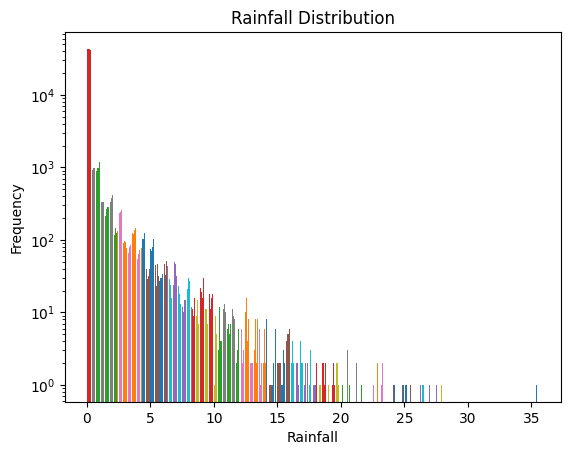

In [169]:
# Plot the logarithmic distribution of the rainfall from aws_df["Andheri"]
plt.hist(y_train_unscaled, bins=100, log=True)
plt.xlabel("Rainfall")
plt.ylabel("Frequency")
plt.title("Rainfall Distribution")

Epoch 1, Training Loss : 0.0022271997648382895, Validation Loss: 0.0016111547526753518
Saved model with validation loss: 0.0016111547526753518
Epoch 2, Training Loss : 0.0014523223324461275, Validation Loss: 0.0015010431544804385
Saved model with validation loss: 0.0015010431544804385
Epoch 3, Training Loss : 0.0013121234631080618, Validation Loss: 0.0014266046556442402
Saved model with validation loss: 0.0014266046556442402
Epoch 4, Training Loss : 0.0012284879302485118, Validation Loss: 0.0014424474984306237
Epoch 5, Training Loss : 0.0011667939799706085, Validation Loss: 0.0013416406891977705
Saved model with validation loss: 0.0013416406891977705
Epoch 6, Training Loss : 0.0011402695503609402, Validation Loss: 0.0013013362882861531
Saved model with validation loss: 0.0013013362882861531
Epoch 7, Training Loss : 0.0011165023671543923, Validation Loss: 0.0013305818381111059
Epoch 8, Training Loss : 0.0010865508623486716, Validation Loss: 0.001250461513156472
Saved model with validati

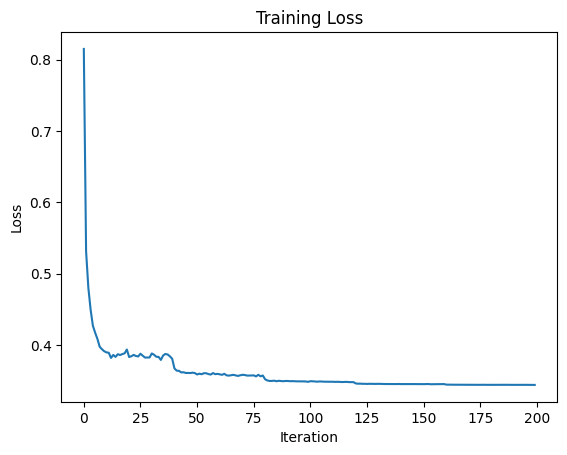

Training score:0.4350 Validation score:0.4219  Andheri


C:\Users\91702\AppData\Local\Temp\ipykernel_15272\4199718076.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('C:/Users/91702/Desktop/S

Epoch 1, Training Loss : 0.0019573079208370114, Validation Loss: 0.001530259649176077
Saved model with validation loss: 0.001530259649176077
Epoch 2, Training Loss : 0.0013198960588225851, Validation Loss: 0.0012890368512582099
Saved model with validation loss: 0.0012890368512582099
Epoch 3, Training Loss : 0.00114361735853135, Validation Loss: 0.0012080800963219596
Saved model with validation loss: 0.0012080800963219596
Epoch 4, Training Loss : 0.0010826999964567837, Validation Loss: 0.0012431773116502788
Epoch 5, Training Loss : 0.0010443087953493975, Validation Loss: 0.0013268262518933793
Epoch 6, Training Loss : 0.0010185882396588249, Validation Loss: 0.0011467292862906483
Saved model with validation loss: 0.0011467292862906483
Epoch 7, Training Loss : 0.00100211733919562, Validation Loss: 0.0010809929990498349
Saved model with validation loss: 0.0010809929990498349
Epoch 8, Training Loss : 0.000988513225313566, Validation Loss: 0.0011052757642207786
Epoch 9, Training Loss : 0.0009

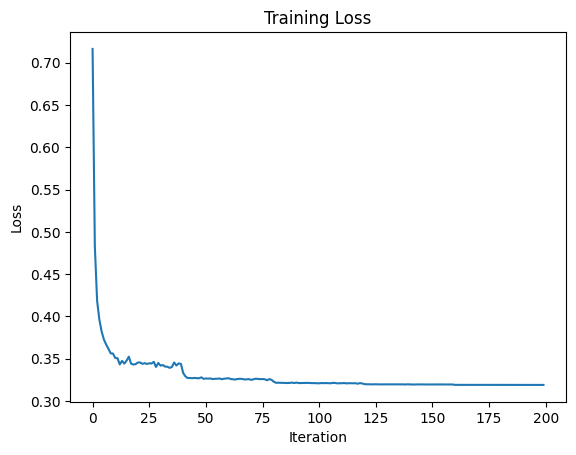

C:\Users\91702\AppData\Local\Temp\ipykernel_15272\4199718076.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('C:/Users/91702/Desktop/S

Training score:0.4061 Validation score:0.5046  B ward
Epoch 1, Training Loss : 0.002896568898551797, Validation Loss: 0.0019246136106869285
Saved model with validation loss: 0.0019246136106869285
Epoch 2, Training Loss : 0.0015955444874147797, Validation Loss: 0.0017719219973375397
Saved model with validation loss: 0.0017719219973375397
Epoch 3, Training Loss : 0.001400723451585636, Validation Loss: 0.0018057542236188876
Epoch 4, Training Loss : 0.0012982733174108855, Validation Loss: 0.00160551308803545
Saved model with validation loss: 0.00160551308803545
Epoch 5, Training Loss : 0.001235671252000484, Validation Loss: 0.0015943744469956828
Saved model with validation loss: 0.0015943744469956828
Epoch 6, Training Loss : 0.0012117151327700293, Validation Loss: 0.001597451117265667
Epoch 7, Training Loss : 0.0011799220336315508, Validation Loss: 0.001571396458804416
Saved model with validation loss: 0.001571396458804416
Epoch 8, Training Loss : 0.001146080370774859, Validation Loss: 0.0

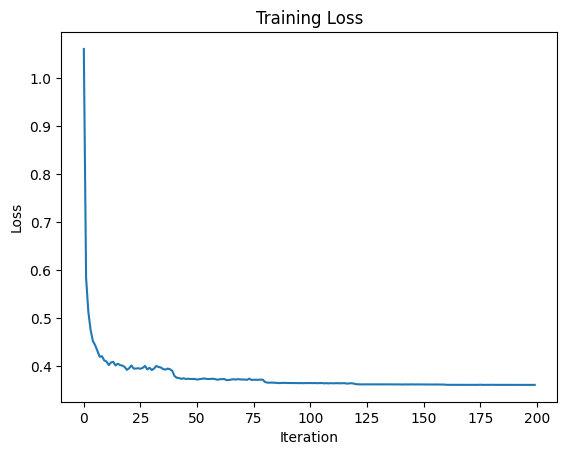

Training score:0.4455 Validation score:0.4794  Bandra


C:\Users\91702\AppData\Local\Temp\ipykernel_15272\4199718076.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('C:/Users/91702/Desktop/S

Epoch 1, Training Loss : 0.0017816125969669675, Validation Loss: 0.001434636296532214
Saved model with validation loss: 0.001434636296532214
Epoch 2, Training Loss : 0.0012544779650246103, Validation Loss: 0.0010943245024825849
Saved model with validation loss: 0.0010943245024825849
Epoch 3, Training Loss : 0.0011201588748435776, Validation Loss: 0.00112300293177197
Epoch 4, Training Loss : 0.001059298478427936, Validation Loss: 0.0011377594387787942
Epoch 5, Training Loss : 0.0010273697492768326, Validation Loss: 0.0010838823973766713
Saved model with validation loss: 0.0010838823973766713
Epoch 6, Training Loss : 0.0010160907121013233, Validation Loss: 0.0011324418982529424
Epoch 7, Training Loss : 0.001000683797662378, Validation Loss: 0.000991206234960726
Saved model with validation loss: 0.000991206234960726
Epoch 8, Training Loss : 0.000994857797334594, Validation Loss: 0.0011213585322599857
Epoch 9, Training Loss : 0.000989248562037857, Validation Loss: 0.0010917369028823093
Epo

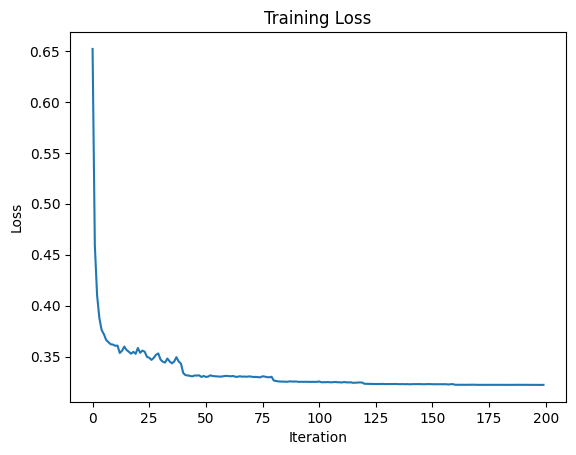

Training score:0.3911 Validation score:0.5090  Byculla


C:\Users\91702\AppData\Local\Temp\ipykernel_15272\4199718076.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('C:/Users/91702/Desktop/S

Epoch 1, Training Loss : 0.001603695708695962, Validation Loss: 0.001278758240102963
Saved model with validation loss: 0.001278758240102963
Epoch 2, Training Loss : 0.0011427714622196552, Validation Loss: 0.0011947043252992125
Saved model with validation loss: 0.0011947043252992125
Epoch 3, Training Loss : 0.001056028415097173, Validation Loss: 0.001158251811030112
Saved model with validation loss: 0.001158251811030112
Epoch 4, Training Loss : 0.0010173372637504036, Validation Loss: 0.0011142268441632374
Saved model with validation loss: 0.0011142268441632374
Epoch 5, Training Loss : 0.0009783897758048037, Validation Loss: 0.001051936243552046
Saved model with validation loss: 0.001051936243552046
Epoch 6, Training Loss : 0.0009741230725941803, Validation Loss: 0.001145433720847025
Epoch 7, Training Loss : 0.0009639948942695994, Validation Loss: 0.001071897584575669
Epoch 8, Training Loss : 0.0009666220788550347, Validation Loss: 0.0011411049510767525
Epoch 9, Training Loss : 0.0009582

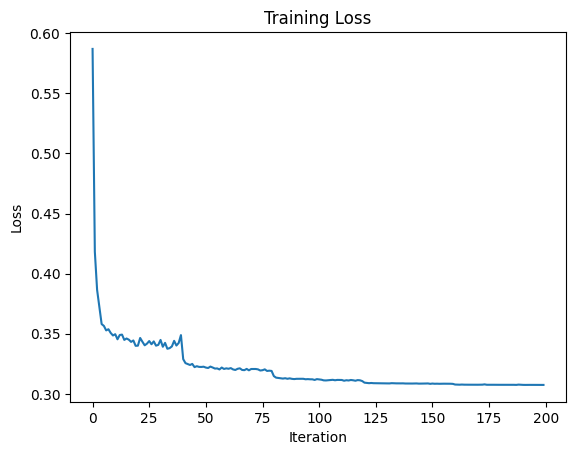

Training score:0.3908 Validation score:0.5127  C ward


C:\Users\91702\AppData\Local\Temp\ipykernel_15272\4199718076.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('C:/Users/91702/Desktop/S

Epoch 1, Training Loss : 0.002427765811396549, Validation Loss: 0.0016619199890546108
Saved model with validation loss: 0.0016619199890546108
Epoch 2, Training Loss : 0.0013932158409991897, Validation Loss: 0.0014020513694201024
Saved model with validation loss: 0.0014020513694201024
Epoch 3, Training Loss : 0.001231808375848376, Validation Loss: 0.0015288732862702758
Epoch 4, Training Loss : 0.0011418377698298615, Validation Loss: 0.001328908914103045
Saved model with validation loss: 0.001328908914103045
Epoch 5, Training Loss : 0.0010781551905604883, Validation Loss: 0.0012605210660814143
Saved model with validation loss: 0.0012605210660814143
Epoch 6, Training Loss : 0.0010264614027450268, Validation Loss: 0.0012770315283175517
Epoch 7, Training Loss : 0.0010072533653532486, Validation Loss: 0.001388937744063249
Epoch 8, Training Loss : 0.0009850418969878769, Validation Loss: 0.0012028002235484202
Saved model with validation loss: 0.0012028002235484202
Epoch 9, Training Loss : 0.00

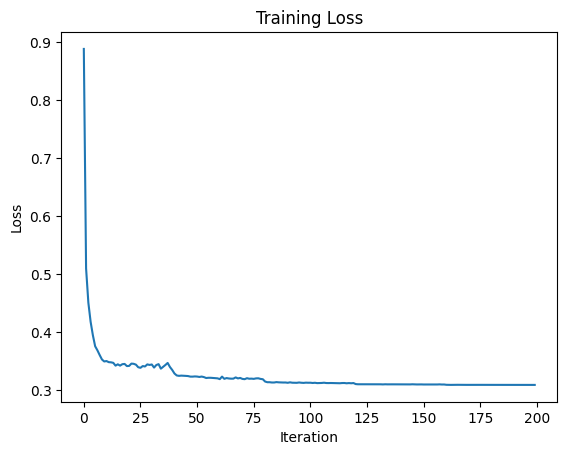

Training score:0.4017 Validation score:0.4454  Chembur


C:\Users\91702\AppData\Local\Temp\ipykernel_15272\4199718076.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('C:/Users/91702/Desktop/S

Epoch 1, Training Loss : 0.00178848316430501, Validation Loss: 0.0011729700749429505
Saved model with validation loss: 0.0011729700749429505
Epoch 2, Training Loss : 0.0010939221498378314, Validation Loss: 0.0010268910443395566
Saved model with validation loss: 0.0010268910443395566
Epoch 3, Training Loss : 0.0009647722090747146, Validation Loss: 0.0009077305650810836
Saved model with validation loss: 0.0009077305650810836
Epoch 4, Training Loss : 0.0008828191789117759, Validation Loss: 0.0009513364386120984
Epoch 5, Training Loss : 0.0008406094690502361, Validation Loss: 0.0009954141453972077
Epoch 6, Training Loss : 0.0008367188593332625, Validation Loss: 0.0009073674446633467
Saved model with validation loss: 0.0009073674446633467
Epoch 7, Training Loss : 0.0008019437214510409, Validation Loss: 0.000917341664580569
Epoch 8, Training Loss : 0.0007955997938492534, Validation Loss: 0.0009314148996143886
Epoch 9, Training Loss : 0.0007735016574496925, Validation Loss: 0.0009147780654255

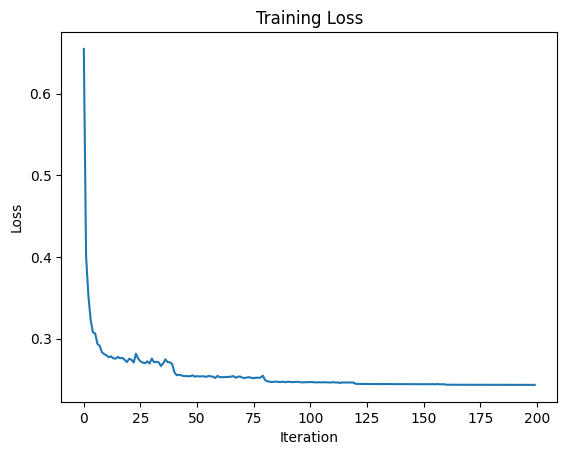

Training score:0.4404 Validation score:0.4633  Chincholi


C:\Users\91702\AppData\Local\Temp\ipykernel_15272\4199718076.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('C:/Users/91702/Desktop/S

Epoch 1, Training Loss : 0.00169768313768503, Validation Loss: 0.001321169177400839
Saved model with validation loss: 0.001321169177400839
Epoch 2, Training Loss : 0.0011963645986531341, Validation Loss: 0.0011990792942124444
Saved model with validation loss: 0.0011990792942124444
Epoch 3, Training Loss : 0.0010823484896166921, Validation Loss: 0.0011030990882328231
Saved model with validation loss: 0.0011030990882328231
Epoch 4, Training Loss : 0.0010394307876500693, Validation Loss: 0.0011109478098715144
Epoch 5, Training Loss : 0.0010281408259621566, Validation Loss: 0.0011353645422695821
Epoch 6, Training Loss : 0.0010042217262076528, Validation Loss: 0.0011286957780577028
Epoch 7, Training Loss : 0.0010075543853174387, Validation Loss: 0.0011804163752167668
Epoch 8, Training Loss : 0.0009859582246487955, Validation Loss: 0.0010814171334271152
Saved model with validation loss: 0.0010814171334271152
Epoch 9, Training Loss : 0.000987994575393838, Validation Loss: 0.001116112783125365

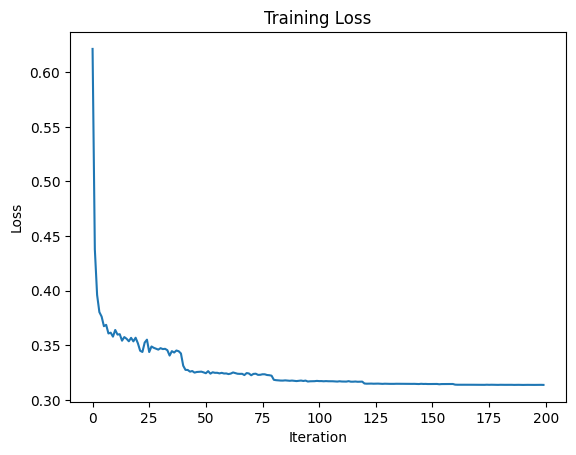

Training score:0.4153

C:\Users\91702\AppData\Local\Temp\ipykernel_15272\4199718076.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('C:/Users/91702/Desktop/S

 Validation score:0.4976  Colaba
Epoch 1, Training Loss : 0.002089105053140675, Validation Loss: 0.001257970259360119
Saved model with validation loss: 0.001257970259360119
Epoch 2, Training Loss : 0.0012812395671559396, Validation Loss: 0.0011815052303113267
Saved model with validation loss: 0.0011815052303113267
Epoch 3, Training Loss : 0.001108999803657211, Validation Loss: 0.0010018673869936457
Saved model with validation loss: 0.0010018673869936457
Epoch 4, Training Loss : 0.001043553111210842, Validation Loss: 0.001113022449476251
Epoch 5, Training Loss : 0.0009688856040812708, Validation Loss: 0.001122333426643368
Epoch 6, Training Loss : 0.0009130554248596659, Validation Loss: 0.0012470392542099583
Epoch 7, Training Loss : 0.0008789080139783928, Validation Loss: 0.0010573351952546947
Epoch 8, Training Loss : 0.0008494268784419089, Validation Loss: 0.0011425015357521948
Epoch 9, Training Loss : 0.0008558293527721865, Validation Loss: 0.000992096321835508
Saved model with validat

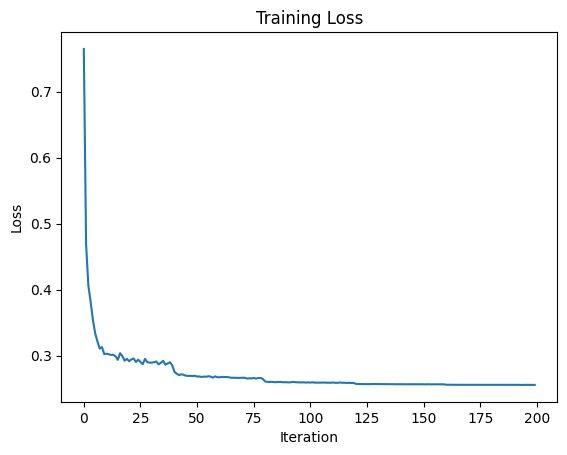

C:\Users\91702\AppData\Local\Temp\ipykernel_15272\4199718076.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('C:/Users/91702/Desktop/S

Training score:0.3846 Validation score:0.4766  D Ward
Epoch 1, Training Loss : 0.001844067507565958, Validation Loss: 0.0013447553166094468
Saved model with validation loss: 0.0013447553166094468
Epoch 2, Training Loss : 0.0013538005486190513, Validation Loss: 0.0013040521905719174
Saved model with validation loss: 0.0013040521905719174
Epoch 3, Training Loss : 0.0012500890336381756, Validation Loss: 0.0011558433575814086
Saved model with validation loss: 0.0011558433575814086
Epoch 4, Training Loss : 0.001168557713326713, Validation Loss: 0.0011434773807291578
Saved model with validation loss: 0.0011434773807291578
Epoch 5, Training Loss : 0.0011464059731383588, Validation Loss: 0.001216647586261388
Epoch 6, Training Loss : 0.001137685725691886, Validation Loss: 0.0011360579353462865
Saved model with validation loss: 0.0011360579353462865
Epoch 7, Training Loss : 0.0011249770000201645, Validation Loss: 0.0011892771829236373
Epoch 8, Training Loss : 0.0011034786217808444, Validation Lo

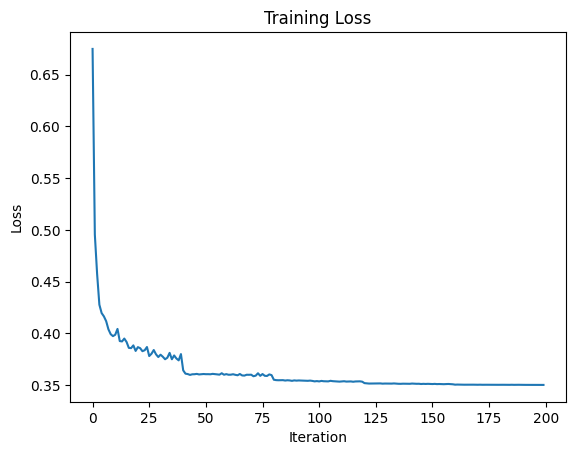

C:\Users\91702\AppData\Local\Temp\ipykernel_15272\4199718076.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('C:/Users/91702/Desktop/S

Training score:0.4384 Validation score:0.4577  Dahisar
Epoch 1, Training Loss : 0.0028819832664563273, Validation Loss: 0.0010574788900798847
Saved model with validation loss: 0.0010574788900798847
Epoch 2, Training Loss : 0.0013776946565724115, Validation Loss: 0.000862370730480949
Saved model with validation loss: 0.000862370730480949
Epoch 3, Training Loss : 0.0011904575129464533, Validation Loss: 0.0007523464738205505
Saved model with validation loss: 0.0007523464738205505
Epoch 4, Training Loss : 0.001082406607660073, Validation Loss: 0.0007664288963685658
Epoch 5, Training Loss : 0.0010120574222073529, Validation Loss: 0.0009297163263812256
Epoch 6, Training Loss : 0.000962673517149527, Validation Loss: 0.0008358587610490251
Epoch 7, Training Loss : 0.0009333498183067868, Validation Loss: 0.0007643883665202184
Epoch 8, Training Loss : 0.0009296183302044955, Validation Loss: 0.0006978565414228356
Saved model with validation loss: 0.0006978565414228356
Epoch 9, Training Loss : 0.00

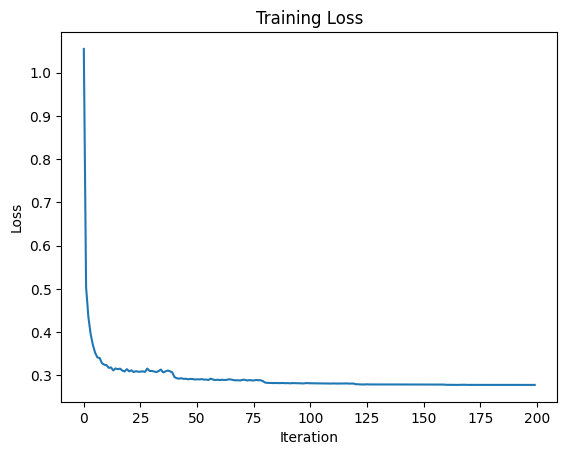

C:\Users\91702\AppData\Local\Temp\ipykernel_15272\4199718076.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('C:/Users/91702/Desktop/S

Training score:0.4389 Validation score:0.4537  Dindoshi
Epoch 1, Training Loss : 0.00278806539864376, Validation Loss: 0.0012408210486931442
Saved model with validation loss: 0.0012408210486931442
Epoch 2, Training Loss : 0.0012964117342333915, Validation Loss: 0.000896729932466143
Saved model with validation loss: 0.000896729932466143
Epoch 3, Training Loss : 0.0010738402158638992, Validation Loss: 0.000895787272975461
Saved model with validation loss: 0.000895787272975461
Epoch 4, Training Loss : 0.000956040735183477, Validation Loss: 0.0009922898819258194
Epoch 5, Training Loss : 0.0008890775898776827, Validation Loss: 0.0008106367087103521
Saved model with validation loss: 0.0008106367087103521
Epoch 6, Training Loss : 0.0008355432599601641, Validation Loss: 0.0007698009211443619
Saved model with validation loss: 0.0007698009211443619
Epoch 7, Training Loss : 0.0008063291647911067, Validation Loss: 0.0007842562131944228
Epoch 8, Training Loss : 0.0007817522166446335, Validation Los

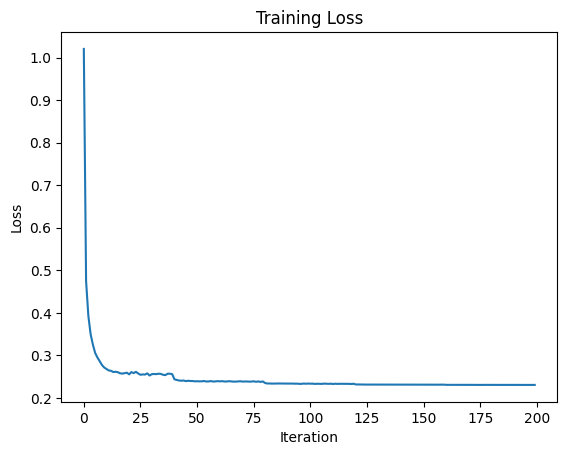

C:\Users\91702\AppData\Local\Temp\ipykernel_15272\4199718076.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('C:/Users/91702/Desktop/S

Training score:0.4250 Validation score:0.4522  F North
Epoch 1, Training Loss : 0.002630230109016487, Validation Loss: 0.0015195694851505431
Saved model with validation loss: 0.0015195694851505431
Epoch 2, Training Loss : 0.0017453599600324946, Validation Loss: 0.0013270917304092859
Saved model with validation loss: 0.0013270917304092859
Epoch 3, Training Loss : 0.0015455501545615026, Validation Loss: 0.0014696562610776356
Epoch 4, Training Loss : 0.00146547801534345, Validation Loss: 0.001323516065860846
Saved model with validation loss: 0.001323516065860846
Epoch 5, Training Loss : 0.0013927974454060457, Validation Loss: 0.0012552920757078951
Saved model with validation loss: 0.0012552920757078951
Epoch 6, Training Loss : 0.001342568799721006, Validation Loss: 0.0013047523990166443
Epoch 7, Training Loss : 0.0013268740721749234, Validation Loss: 0.0012244464766011133
Saved model with validation loss: 0.0012244464766011133
Epoch 8, Training Loss : 0.001282436340837994, Validation Loss

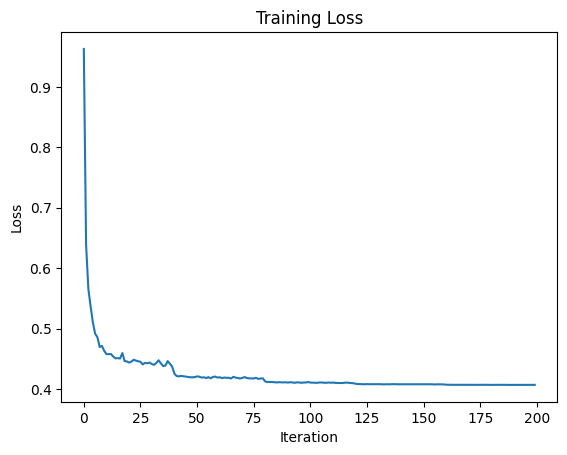

C:\Users\91702\AppData\Local\Temp\ipykernel_15272\4199718076.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('C:/Users/91702/Desktop/S

Training score:0.4247 Validation score:0.4757  F South
Epoch 1, Training Loss : 0.002074009157263017, Validation Loss: 0.001552742099724764
Saved model with validation loss: 0.001552742099724764
Epoch 2, Training Loss : 0.0015268019450474734, Validation Loss: 0.001390573075206785
Saved model with validation loss: 0.001390573075206785
Epoch 3, Training Loss : 0.0014024113613524973, Validation Loss: 0.0013457153434829393
Saved model with validation loss: 0.0013457153434829393
Epoch 4, Training Loss : 0.0013854193899244874, Validation Loss: 0.0014980633805350553
Epoch 5, Training Loss : 0.001342537676355079, Validation Loss: 0.001418492800605579
Epoch 6, Training Loss : 0.0013190131977040198, Validation Loss: 0.0014378507281184324
Epoch 7, Training Loss : 0.0013172403533778872, Validation Loss: 0.0014656276060410398
Epoch 8, Training Loss : 0.001302847429790949, Validation Loss: 0.0014352294939694878
Epoch 9, Training Loss : 0.0013216035238586754, Validation Loss: 0.0013007102790852465
Sa

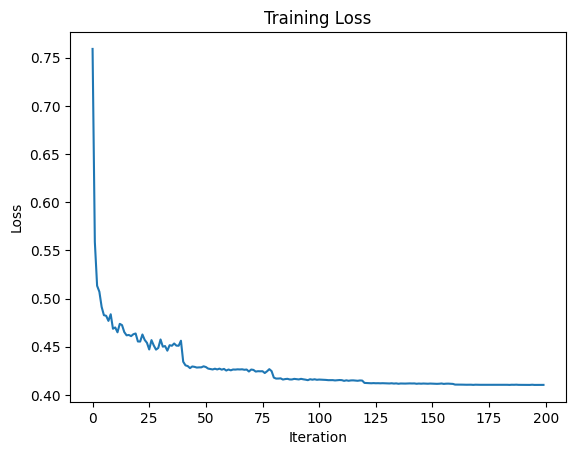

C:\Users\91702\AppData\Local\Temp\ipykernel_15272\4199718076.py:118: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('C:/Users/91702/Desktop/S

Training score:0.4367 Validation score:0.4536  G South
Epoch 1, Training Loss : 0.002023256009303369, Validation Loss: 0.0012646415381197108
Saved model with validation loss: 0.0012646415381197108
Epoch 2, Training Loss : 0.0013853817652717559, Validation Loss: 0.0010614610216597626
Saved model with validation loss: 0.0010614610216597626
Epoch 3, Training Loss : 0.0012202722697469146, Validation Loss: 0.0009904286969562377
Saved model with validation loss: 0.0009904286969562377
Epoch 4, Training Loss : 0.0011622106646174244, Validation Loss: 0.0011101790716747432
Epoch 5, Training Loss : 0.0011358894575931146, Validation Loss: 0.0009612742264216973
Saved model with validation loss: 0.0009612742264216973
Epoch 6, Training Loss : 0.0011022828774678755, Validation Loss: 0.001018652830712671
Epoch 7, Training Loss : 0.0011087856039578537, Validation Loss: 0.0010236019536192355
Epoch 8, Training Loss : 0.0010935471190315865, Validation Loss: 0.0010338302991134425
Epoch 9, Training Loss : 0.

In [74]:
# Create Neural network with 3 hidden layers
class Net(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.fc4 = nn.Linear(hidden_size3, output_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        return out
    
class ModelCheckpoint:
    def __init__(self, filepath):
        self.filepath = filepath
        self.min_val_loss = float('inf')
    
    def __call__(self, model, val_loss):
        if val_loss < self.min_val_loss:
            self.min_val_loss = val_loss
            torch.save(model.state_dict(), self.filepath)
            print(f'Saved model with validation loss: {self.min_val_loss}')

# Set number of decimal places to 4
np.set_printoptions(precision=4)
nn_list = []
for i in range(y.shape[1]):
    X_train = np.concatenate((aws_train[:, :, i], gfs_train_reduced), axis=1)
    X_val = np.concatenate((aws_val[:,:,i], gfs_val_reduced), axis=1)
    X_train = np.asarray(X_train,dtype=np.float32)
    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train2 = np.asarray(y_train[:, i],dtype=np.float32)
    y_train2 = np.reshape(y_train2, (-1, 1))
    y_train2 = torch.tensor(y_train2, dtype=torch.float32)
    X_val = np.asarray(X_val,dtype=np.float32)
    X_val = torch.tensor(X_val, dtype=torch.float32)
    y_val2 = np.asarray(y_val[:, i],dtype=np.float32)
    y_val2 = np.reshape(y_val2, (-1, 1))
    y_val2 = torch.tensor(y_val2, dtype=torch.float32)
    model = Net(input_size = X_train.shape[1], hidden_size1 = 64, hidden_size2 = 32, hidden_size3 = 16, output_size = 1)
    # Use gpu if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)



        
    # Use batched training
    batch_size = 128
    train_dataset = torch.utils.data.TensorDataset(X_train, y_train2)
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    val_dataset = torch.utils.data.TensorDataset(X_val, y_val2)
    val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

    epochs = 200
    learning_rate = 0.003
    l1_lambda = 0.000002
    l2_lambda = 0.000002
    step_size = 40
    gamma = 0.3
    
    nn_list.append(model)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)  # Learning rate scheduler
    checkpoint_callback = ModelCheckpoint('C:/Users/91702/Desktop/Sem_9/ITU_hackathon/best_model'+str(i)+'.pth')
    loss_list = []
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for j, (inputs, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs,labels)

            l1_norm = sum(p.abs().sum() for p in model.parameters())
            l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
            loss = loss + l1_lambda * l1_norm + l2_lambda * l2_norm
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        # Calculate validation loss
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
    
        print(f'Epoch {epoch+1}, Training Loss : {epoch_loss/len(train_loader)}, Validation Loss: {val_loss/len(val_loader)}')
        loss_list.append(epoch_loss)

        checkpoint_callback(model,avg_val_loss)

        scheduler.step()
        
    # Plot the training and validation loss
    plt.plot(loss_list)
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.show()
    
    
    # Re-read the best model
    model.load_state_dict(torch.load('C:/Users/91702/Desktop/Sem_9/ITU_hackathon/best_model'+str(i)+'.pth'))
    model.eval()
    with torch.no_grad():
        y_pred = model(X_val)
        y_pred = y_pred.numpy()
        print("Training score:%.4f" % r2_score(y_train2, model(X_train).numpy()), "Validation score:%.4f " % r2_score(y_val2, y_pred), regions[i])

        




cpu
